# Read dataset

In [1]:
import pandas as pd

# Dataset Link: https://www.kaggle.com/datasets/sadmansakib7/ecg-arrhythmia-classification-dataset/data
# Reading MIT-BIH Arrhythmia Dataset as an example
data= pd.read_csv('./Dataset/MIT-BIH Arrhythmia Database.csv') 
print(data.shape)
data.head()

(100689, 34)


,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,101,N,76,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41,...,0.025930,2,18,22,2,0.025930,0.025930,0.025930,0.025436,0.025436
1,101,N,313,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21,...,-0.042009,26,27,62,9,-0.042009,-0.029498,0.005012,0.030892,0.002986
2,101,N,315,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22,...,0.009528,3,8,12,1,0.009528,0.009528,0.008786,0.008786,0.008368
3,101,N,321,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22,...,-0.020536,6,9,16,1,-0.020536,-0.020257,-0.018965,-0.016968,-0.014555
4,101,N,336,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11,...,0.016053,16,5,31,10,0.016053,0.006742,0.002782,-0.007798,-0.051155


In [2]:
data.isnull().sum()

record            0
type              0
0_pre-RR          0
0_post-RR         0
0_pPeak           0
0_tPeak           0
0_rPeak           0
0_sPeak           0
0_qPeak           0
0_qrs_interval    0
0_pq_interval     0
0_qt_interval     0
0_st_interval     0
0_qrs_morph0      0
0_qrs_morph1      0
0_qrs_morph2      0
0_qrs_morph3      0
0_qrs_morph4      0
1_pre-RR          0
1_post-RR         0
1_pPeak           0
1_tPeak           0
1_rPeak           0
1_sPeak           0
1_qPeak           0
1_qrs_interval    0
1_pq_interval     0
1_qt_interval     0
1_st_interval     0
1_qrs_morph0      0
1_qrs_morph1      0
1_qrs_morph2      0
1_qrs_morph3      0
1_qrs_morph4      0
dtype: int64

# Split the data into features and class labels

In [3]:
x_data = data.iloc[:, 2:].copy()
y_label = data[['type']].copy()
y_label.value_counts()

type
N       90083
VEB      7009
SVEB     2779
F         803
Q          15
Name: count, dtype: int64

# Visualization

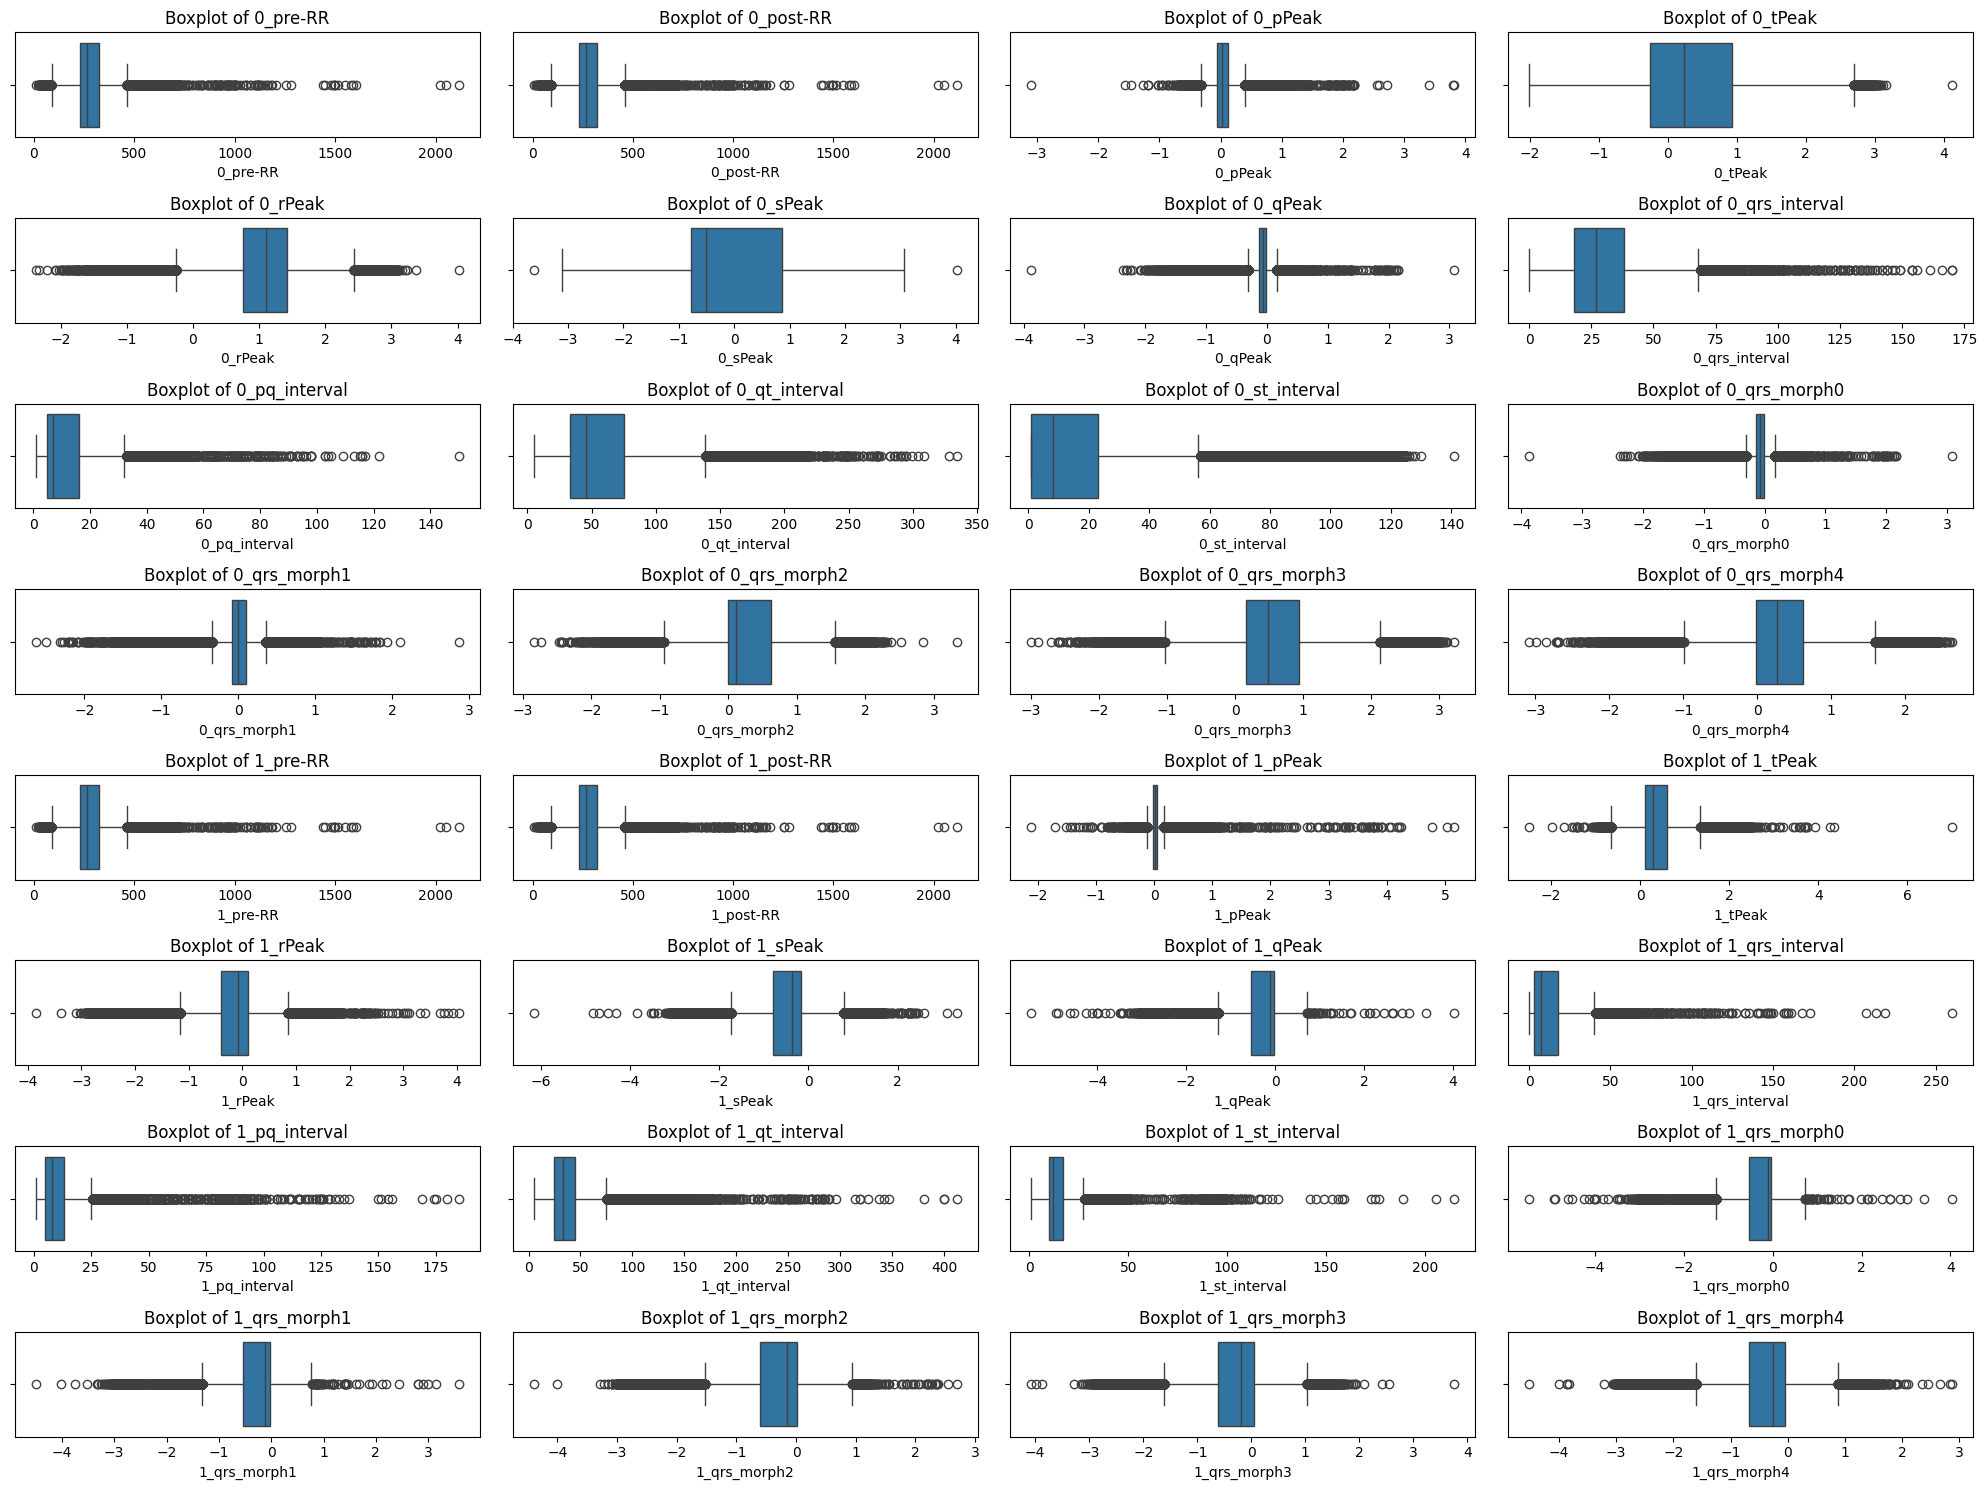

In [4]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
for i, col in enumerate(x_data, 1):
    plt.subplot(8, 4, i)
    sns.boxplot(x=x_data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Noramlization

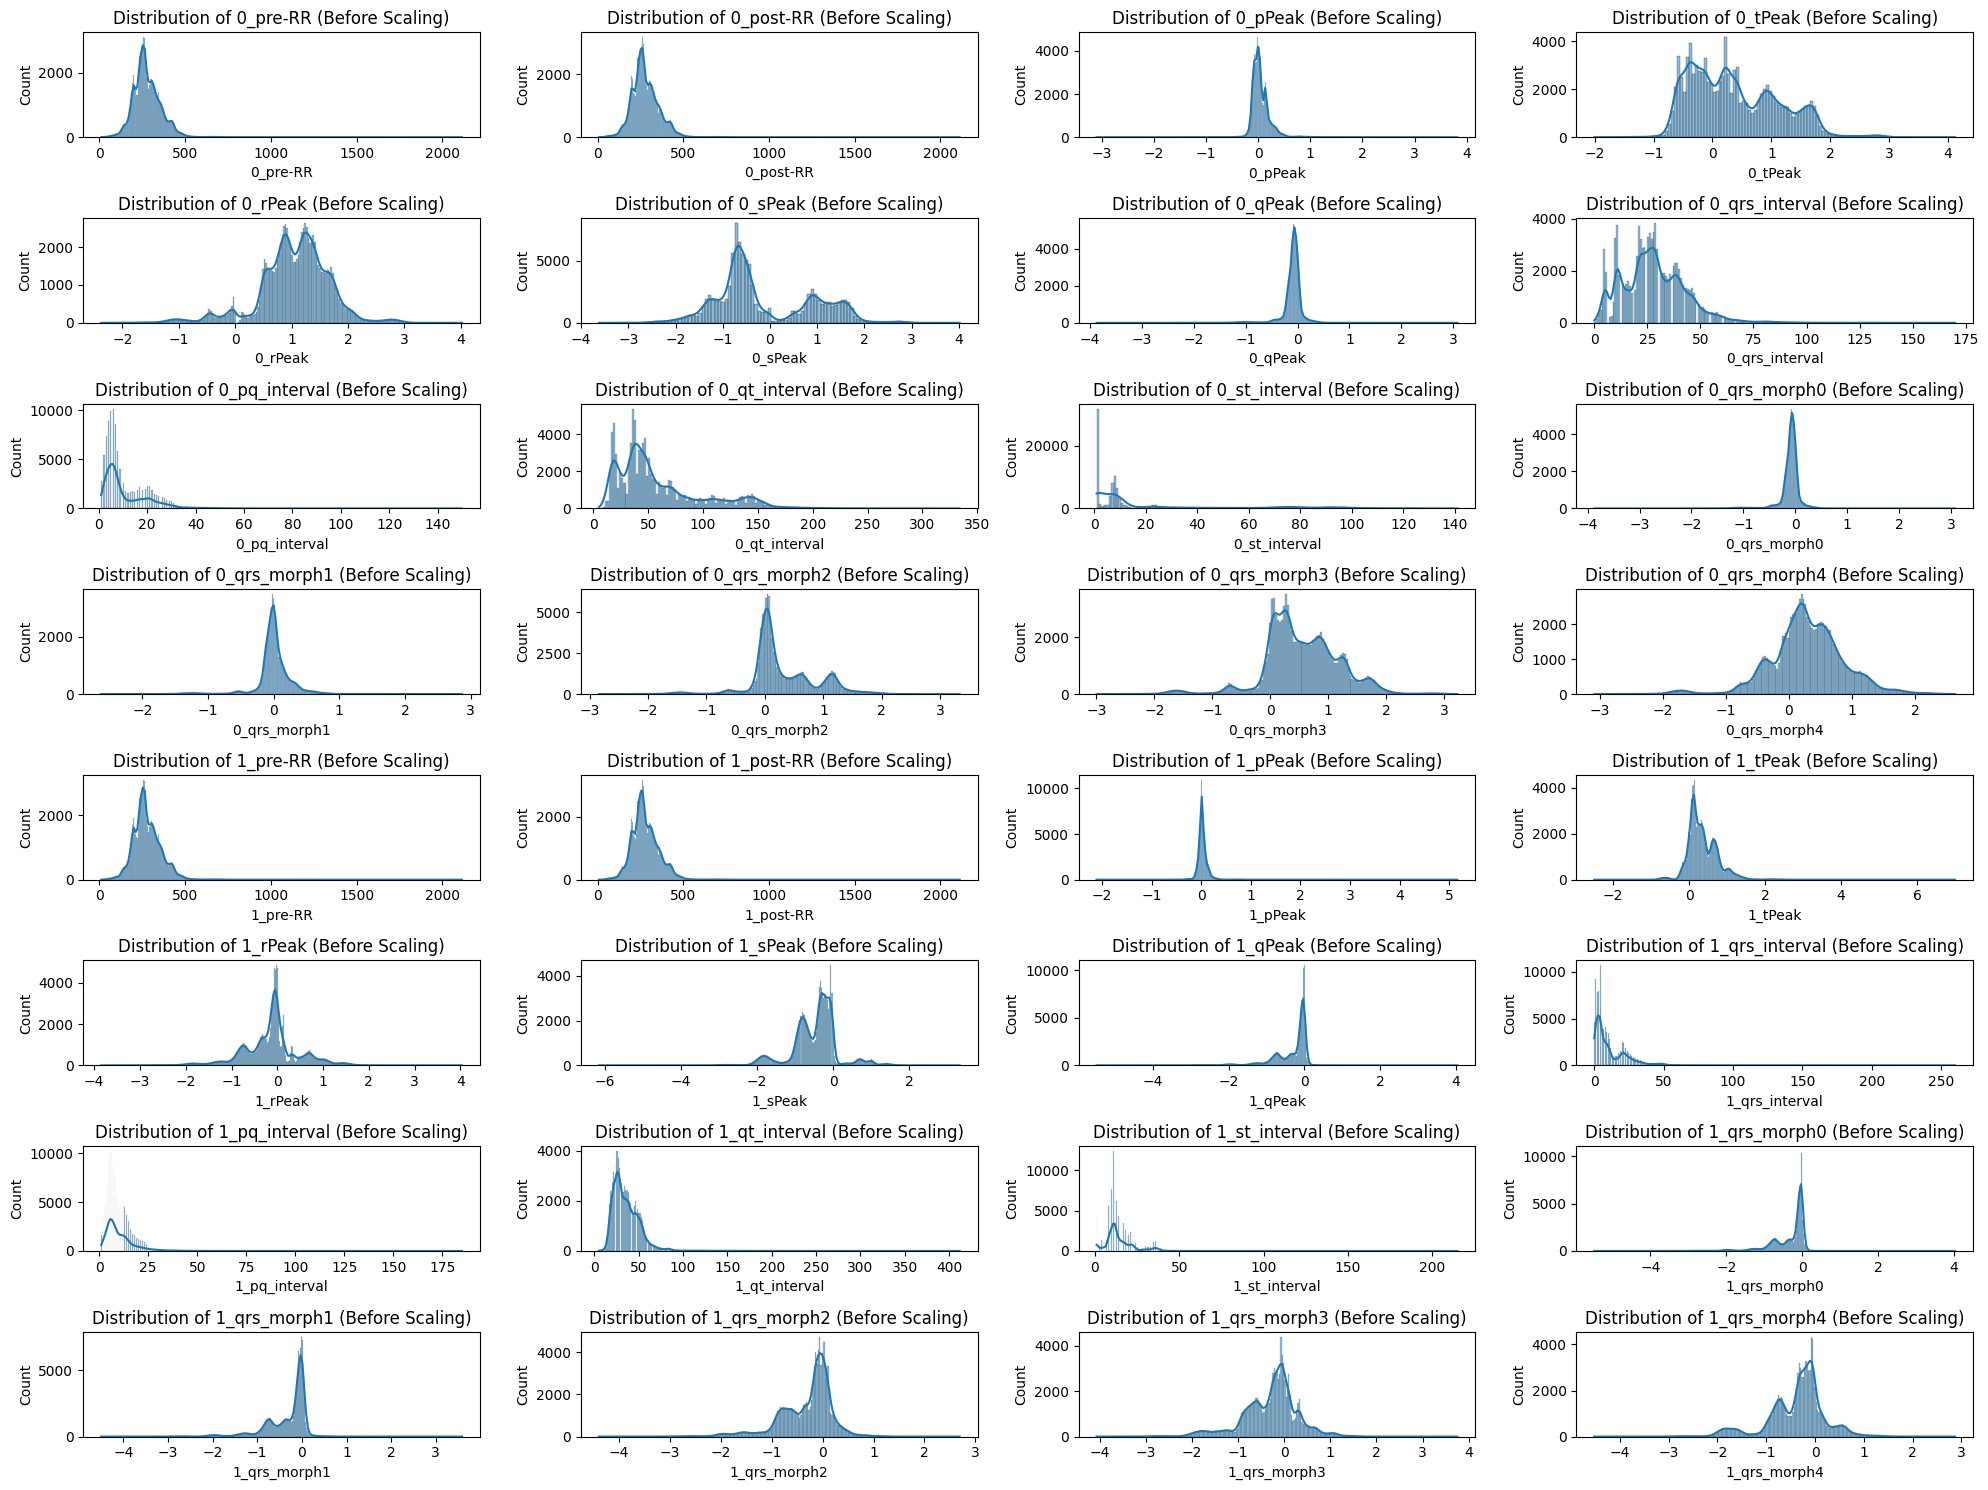

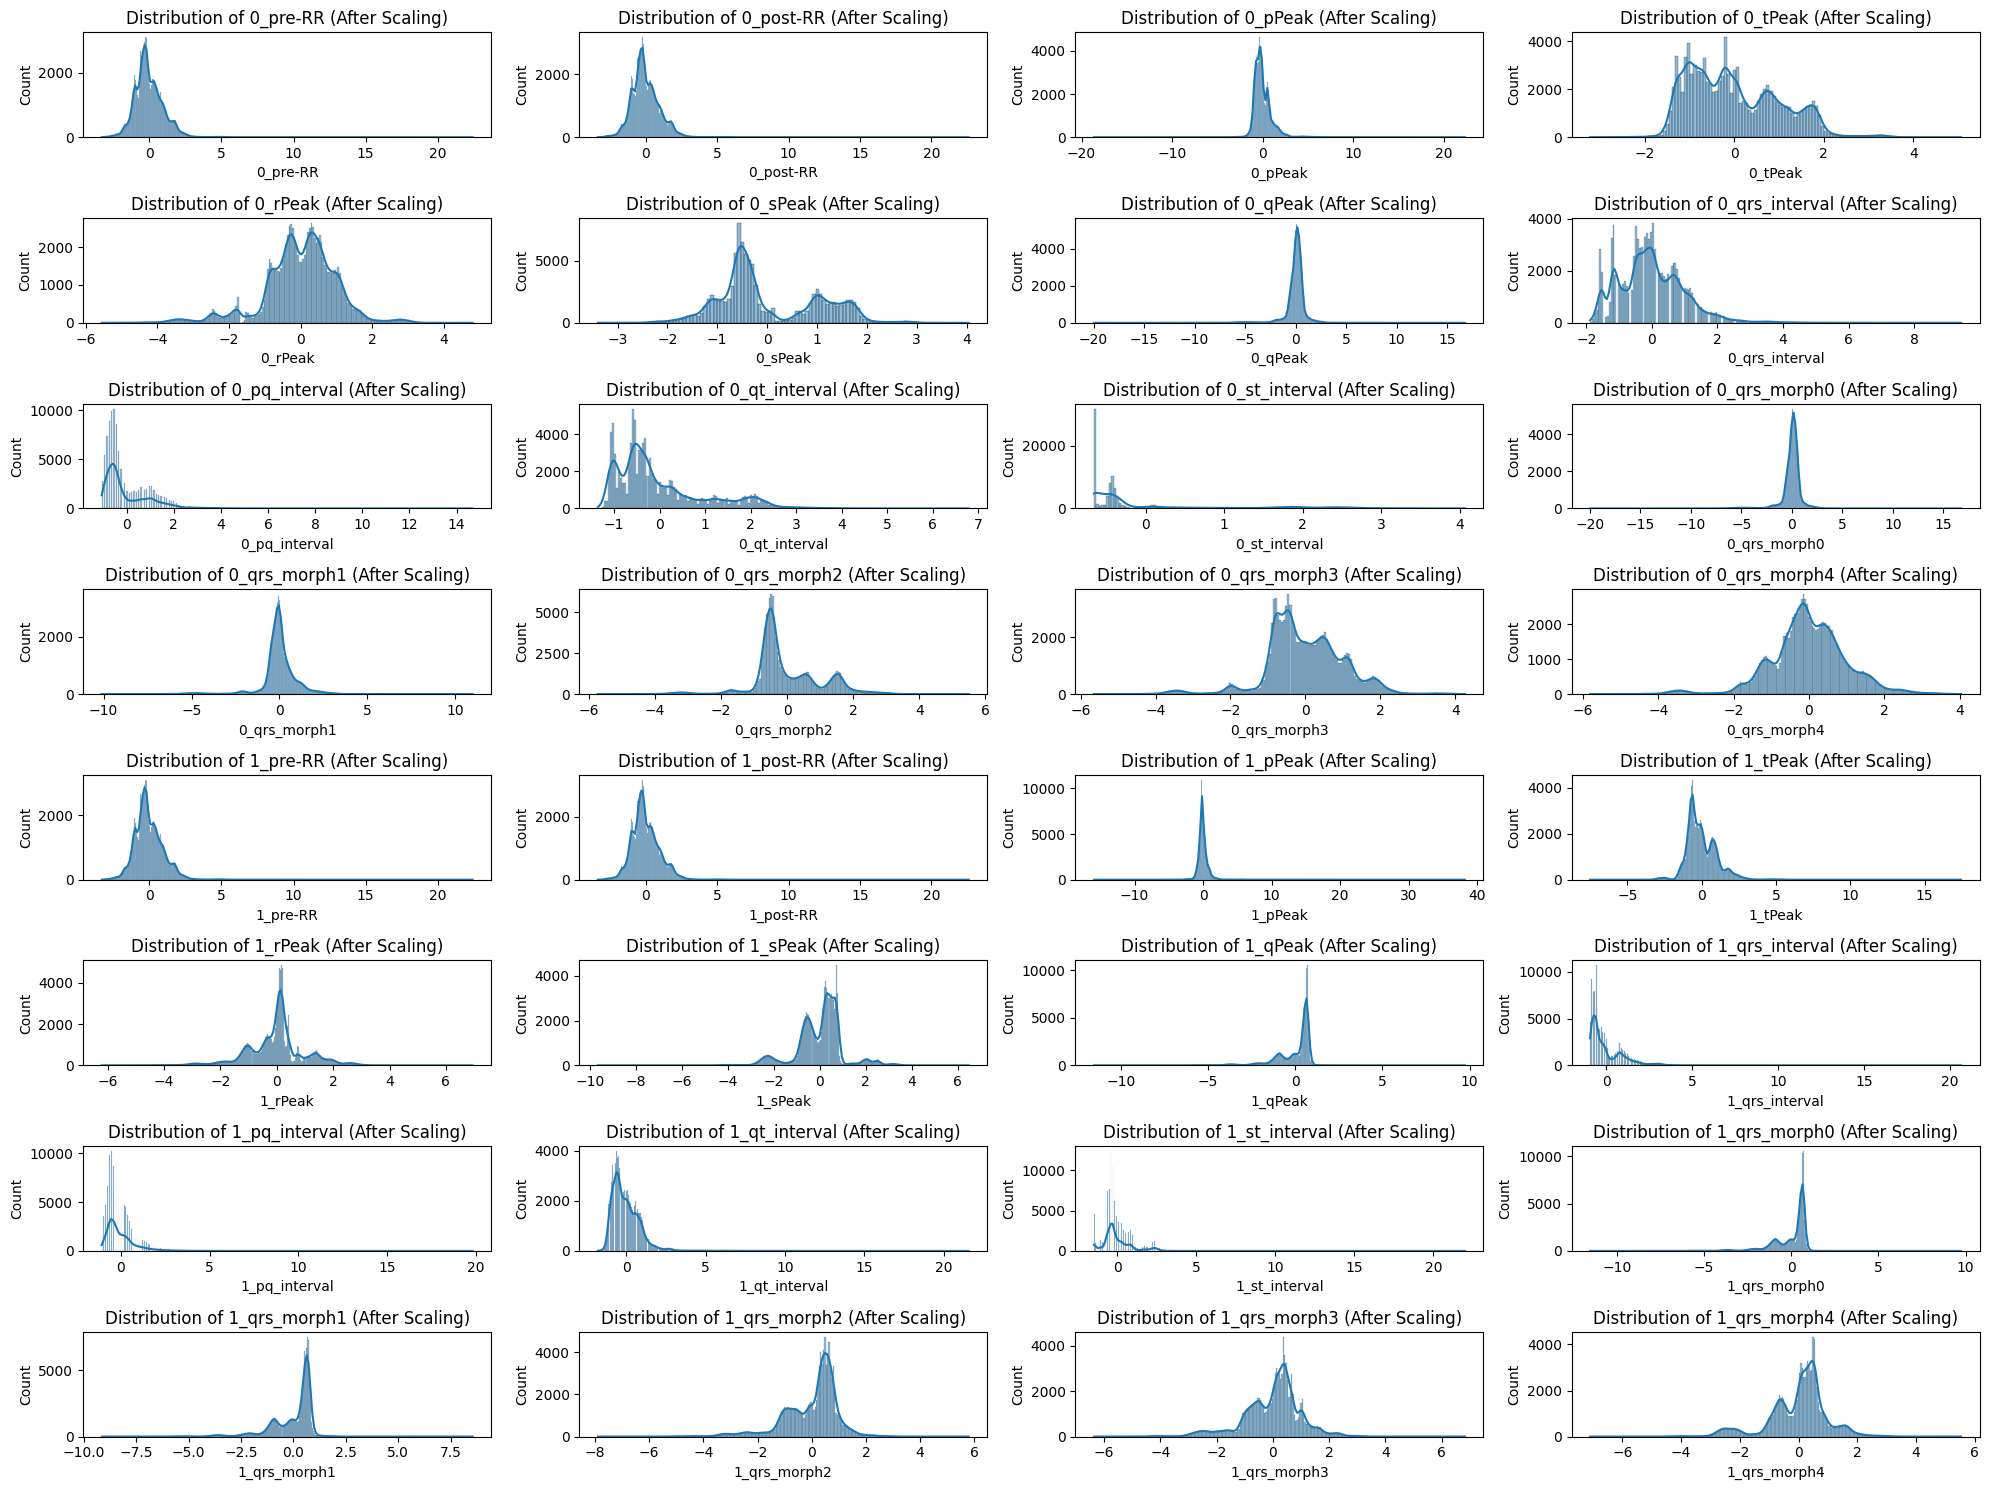

In [5]:
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

numeric_cols = x_data.select_dtypes(include='number').columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(8, 4, i)
    sns.histplot(x=x_data[col], kde=True)
    plt.title(f'Distribution of {col} (Before Scaling)')
plt.tight_layout()
plt.show()

scaler = StandardScaler()
x_data[numeric_cols] = scaler.fit_transform(x_data[numeric_cols])

plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(8, 4, i)
    sns.histplot(x=x_data[col], kde=True)
    plt.title(f'Distribution of {col} (After Scaling)')
plt.tight_layout()
plt.show()


# Transform multi-class labels into binary-class (arrhythmia: 1 and normal: 0)

In [6]:
y_label = data['type'].map({'VEB': 1, 'SVEB': 1, 'F': 1, 'Q': 1, 'N': 0}).astype('int64')

y_label.value_counts()

type
0    90083
1    10606
Name: count, dtype: int64

# Model Training

In [7]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x_data, y_label, test_size=0.3, random_state=101)

gbt_model = GradientBoostingClassifier()
gbt_model.fit(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# training accuracy
print(f'Accuracy of Gradient Boosting Tree model for the train data: {gbt_model.score(X_train, y_train):.3f}', end='\n')
print(f'Accuracy of Random Forest model for the train data: {rf_model.score(X_train, y_train):.3f}', end='\n')

Accuracy of Gradient Boosting Tree model for the train data: 0.981
Accuracy of Random Forest model for the train data: 1.000


# Model Testing

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Gradient Boosting
y_pred_gb = gbt_model.predict(X_test)
y_proba_gb = gbt_model.predict_proba(X_test)[:, 1] if hasattr(gbt_model, 'predict_proba') else gbt_model.decision_function(X_test)

# Random Forest
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

def compute_metrics(y_true, y_pred, y_proba):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, zero_division=0),
        'recall': recall_score(y_true, y_pred, zero_division=0),
        'f1': f1_score(y_true, y_pred, zero_division=0),
        'auc': roc_auc_score(y_true, y_proba) if len(np.unique(y_true)) == 2 else np.nan
    }

metrics_rf = compute_metrics(y_test, y_pred_rf, y_proba_rf)
metrics_gb = compute_metrics(y_test, y_pred_gb, y_proba_gb)

results = pd.DataFrame([metrics_rf, metrics_gb], index=['RandomForest', 'GradientBoosting'])
print('Test metrics (rows = model):')
print(results.transpose())

Test metrics (rows = model):
           RandomForest  GradientBoosting
accuracy       0.988943          0.978349
precision      0.972881          0.951389
recall         0.918694          0.833227
f1             0.945012          0.888396
auc            0.997948          0.989817


# Visualize Models Metrics

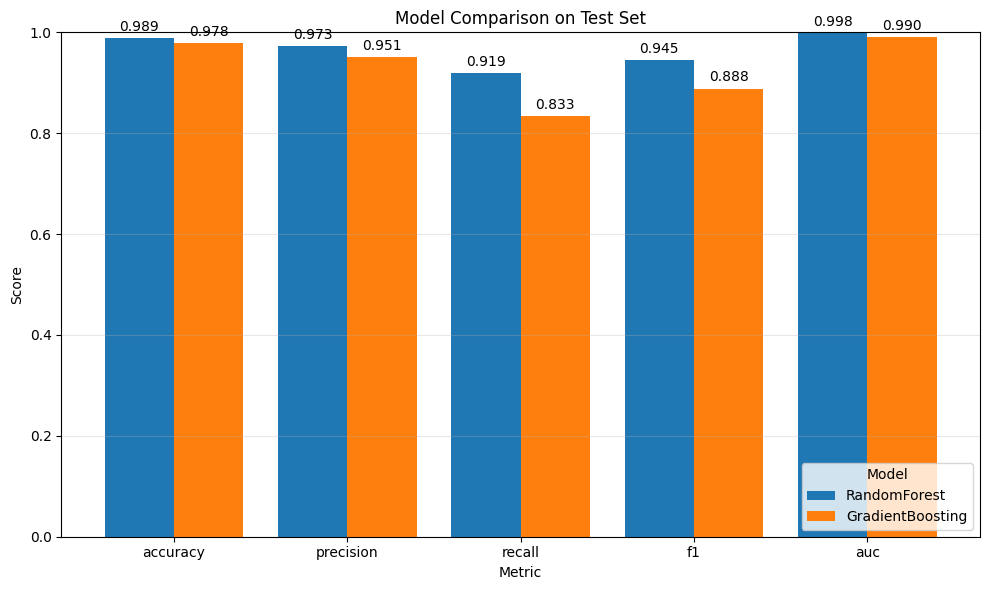

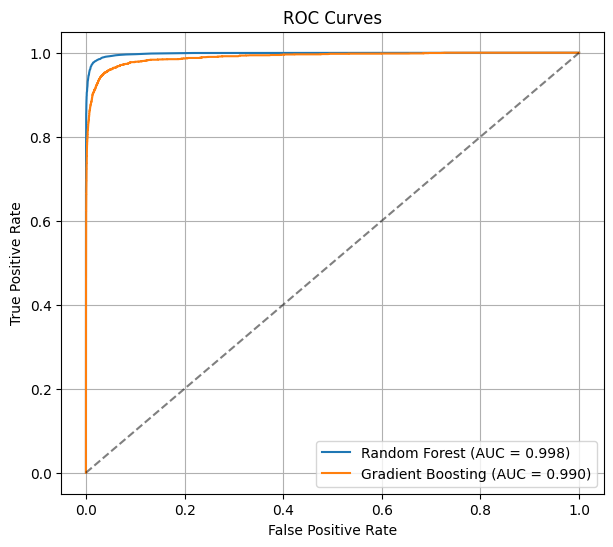

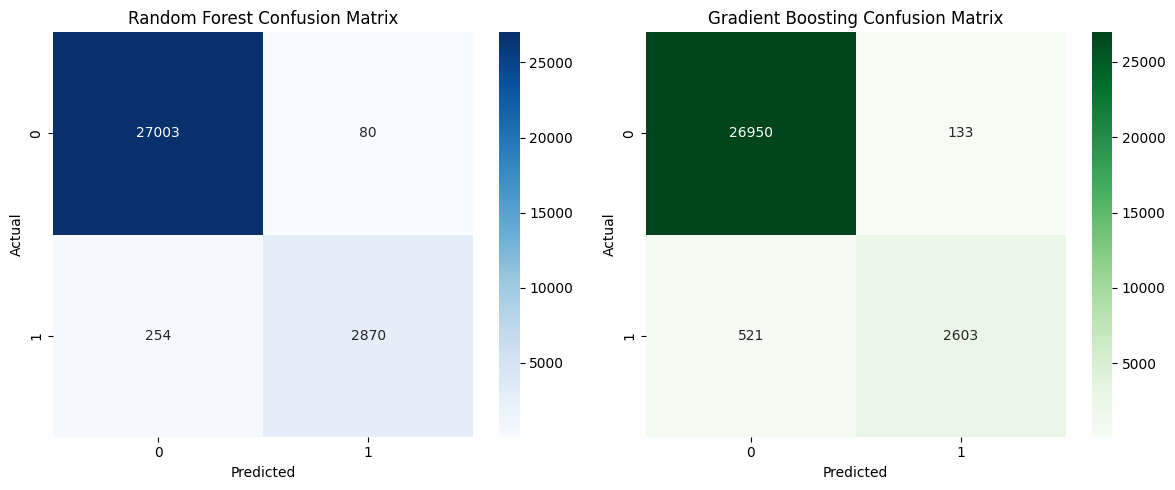

In [9]:
from sklearn.metrics import roc_curve, confusion_matrix

def plot_metrics_comparison(results):
    """Plots a bar chart comparing metrics across models."""
    metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1', 'auc']
    
    results_plot = results[metrics_to_plot]
    
    ax = results_plot.T.plot(kind='bar', figsize=(10, 6), width=0.8)
    plt.title('Model Comparison on Test Set')
    plt.xlabel('Metric')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.legend(title='Model', loc='lower right')
    plt.grid(axis='y', alpha=0.3)
    plt.xticks(rotation=0)
    
    # Add value labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', padding=3)
    
    plt.tight_layout()
    plt.show()
    

def plot_roc_curves(y_test, y_proba_rf, y_proba_gb, metrics_rf, metrics_gb):
    """Plots ROC curves for Random Forest and Gradient Boosting models."""
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
    fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)

    plt.figure(figsize=(7, 6))
    plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {metrics_rf.get("auc", np.nan):.3f})')
    plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {metrics_gb.get("auc", np.nan):.3f})')
    plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

def plot_confusion_matrices(y_test, y_pred_rf, y_pred_gb):
    """Plots confusion matrices for Random Forest and Gradient Boosting models."""
    cm_rf = confusion_matrix(y_test, y_pred_rf)
    cm_gb = confusion_matrix(y_test, y_pred_gb)

    plt.figure(figsize=(12, 5))
    
    # Random Forest
    plt.subplot(1, 2, 1)
    sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
    plt.title('Random Forest Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Gradient Boosting
    plt.subplot(1, 2, 2)
    sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Greens')
    plt.title('Gradient Boosting Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    plt.tight_layout()
    plt.show()

# Execute the visualization functions
plot_metrics_comparison(results)
plot_roc_curves(y_test, y_proba_rf,  y_proba_gb, metrics_rf, metrics_gb)
plot_confusion_matrices(y_test, y_pred_rf, y_pred_gb)
